In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(digits.data)
X = scaler.transform(digits.data)
y = digits.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
models = {
    "knn" : 
        {
        "model" : KNeighborsClassifier(),
        "params" : {"n_neighbors" : [x for x in range(1, 10)]}
        }
    }

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
scores = []
clf = None

for model_name, mp in models.items():
    clf = GridSearchCV(mp["model"], mp["params"], cv=100, return_train_score=False)
    clf.fit(X, y)
    print(clf.best_score_, clf.best_params_)

0.9883333333333333 {'n_neighbors': 5}


Text(58.222222222222214, 0.5, 'Actual')

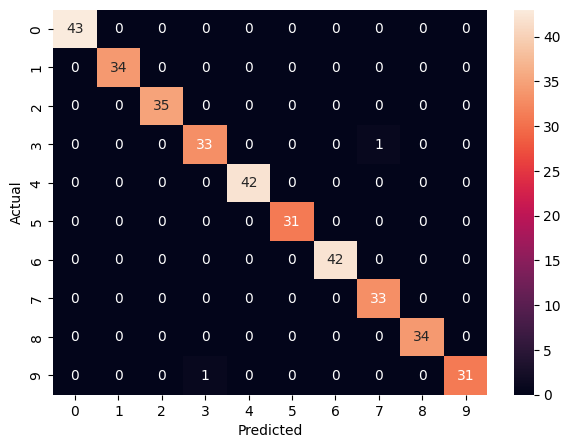

In [10]:
import matplotlib.pyplot as plt
#m = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'])
#m.fit(X_test, y_test)
y_pred = clf.predict(X_test)
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        35
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        31
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.99        33
           8       1.00      1.00      1.00        34
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

